In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv("pesos_y_alturas.csv")

In [2]:
X = data[['Sexo', 'Altura']].copy()  # make a copy of the original dataframe
X['Sexo'] = X['Sexo'].apply(lambda x: 1 if x == 'Masculino' else 0)  # replace 'Masculino' with 1, 'Femenino' with 0
y = data['Peso']


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1551)

In [4]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test =  np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [5]:
X_train = np.column_stack(([1]*X_train.shape[0], X_train)) # add a column with ones for the bias value while converting it into a matrix
m,n = X_train.shape # rows and columns 
theta = np.array([1] * n) # initial theta
X = np.array(X_train) # convert X_train into a numpy matrix
y_train = y_train.values
y = y_train.flatten() # convert y into an array

alpha = 0.02 # alpha value 
iteration = 1000 # iterations
cost = [] # list to store cost values
theta_new = [] # list to store updates coeffient values

In [6]:
# Linear Regression function

for i in range(0, iteration):
    pred = np.matmul(X,theta) # Calculate predicted value
    J = 1/2 * ((np.square(pred - y)).mean()) # Calculate cost function
   
    t_cols = 0 # iteration for theta values
    
    # Update the theta values for all the features with the gradient of the cost function
    for t_cols in range(0,n): 
        t = round(theta[t_cols] - alpha/m * sum((pred-y)*X[:,t_cols]),4) # calculate new theta value
        theta_new.append(t) # save new theta values in a temporary array
        
# update theta array
    theta = [] # empty the theta array
    theta = theta_new # assign new values of theta to array
    theta_new = [] # empty temporary array
    cost.append(J) # append cost function to the cost array

Text(0, 0.5, 'Cost Function Value')

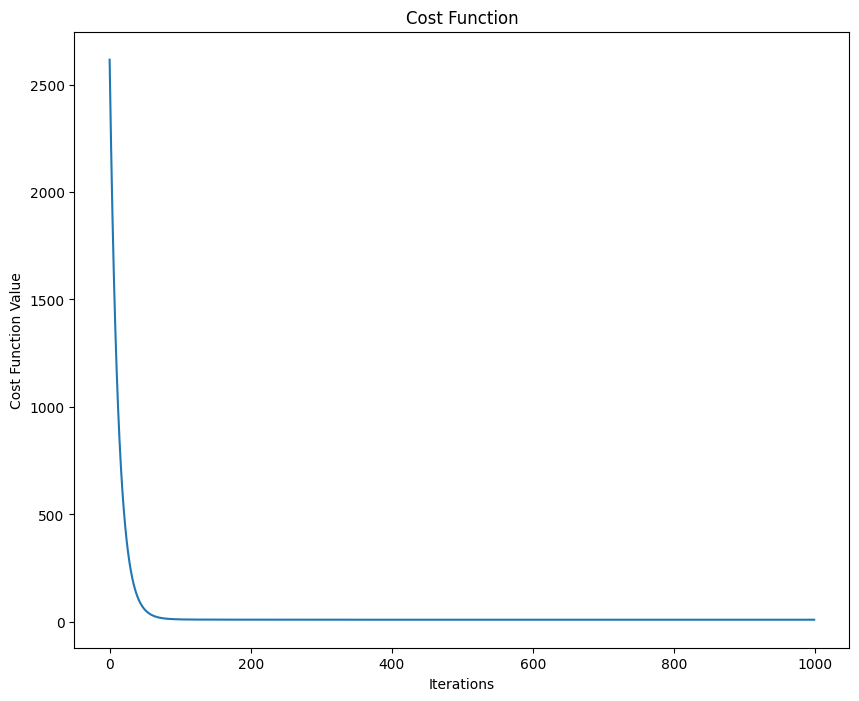

In [7]:
plt.figure(figsize=(10,8))
plt.plot(cost)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')

In [8]:
print("The theta values for the model are :", theta)

The theta values for the model are : [36.5907, 36.5907, 4.404, 10.3579]


In [9]:
X_test = np.column_stack(([1]*X_test.shape[0], X_test)) # add a column with ones for the bias value while converting it into a matrix
y_pred = np.matmul(X_test,theta)

In [10]:
import math
from sklearn.metrics import r2_score
rmse = round(math.sqrt(((y_test-y_pred)**2).mean()),3)
r2 = round(r2_score(y_test,y_pred),3)
print("The Root Mean Square error is: ",rmse)
print("The coefficient of determination is: ", r2)

The Root Mean Square error is:  4.582
The coefficient of determination is:  0.903
